In [3]:
import pandas as pd

In [4]:
FRPdf = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/fire_archive_V1_106931.csv')

In [5]:
FRPdf.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,40.39339,-79.85433,334.5,0.46,0.63,2012-01-20,619,N,VIIRS,n,1,265.8,5.0,2
1,39.21451,-76.47873,328.7,0.59,0.53,2012-01-20,619,N,VIIRS,n,1,271.7,5.2,2
2,39.21748,-76.47753,328.3,0.59,0.53,2012-01-20,619,N,VIIRS,n,1,272.9,5.5,2
3,36.58757,-78.58813,298.0,0.37,0.58,2012-01-20,620,N,VIIRS,n,1,272.2,1.8,0
4,37.35370,-77.32359,298.0,0.63,0.54,2012-01-20,620,N,VIIRS,n,1,267.8,1.3,0


In [6]:
# total number of rows

FRPdf.shape

(3829694, 14)

In [7]:
# confirming data from 2012-2019

FRPdf['acq_date'].unique()

array(['2012-01-20', '2012-01-21', '2012-01-22', ..., '2019-09-28',
       '2019-09-29', '2019-09-30'], dtype=object)

In [9]:
# checking the number of fire occurance (unique days of fire)
len(FRPdf['acq_date'].unique())

2809

In [13]:
# add a new column, fire_month

import datetime

FRPdf['fire_month'] = pd.DatetimeIndex(FRPdf['acq_date']).month
FRPdf.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type,month,fire_month
0,40.39339,-79.85433,334.5,0.46,0.63,2012-01-20,619,N,VIIRS,n,1,265.8,5.0,2,1,1
1,39.21451,-76.47873,328.7,0.59,0.53,2012-01-20,619,N,VIIRS,n,1,271.7,5.2,2,1,1
2,39.21748,-76.47753,328.3,0.59,0.53,2012-01-20,619,N,VIIRS,n,1,272.9,5.5,2,1,1
3,36.58757,-78.58813,298.0,0.37,0.58,2012-01-20,620,N,VIIRS,n,1,272.2,1.8,0,1,1
4,37.35370,-77.32359,298.0,0.63,0.54,2012-01-20,620,N,VIIRS,n,1,267.8,1.3,0,1,1


In [16]:
# limiting data to west coast

FRPdf_West = FRPdf[(FRPdf.latitude > 34) & (FRPdf.longitude < -114)]

In [17]:
# total datapoints for west coast

FRPdf_West.shape

(1358671, 15)

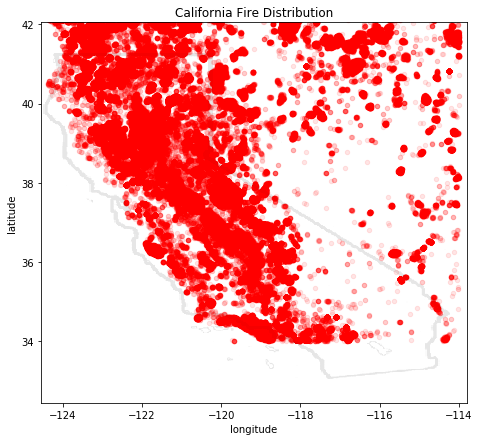

In [36]:
# California Fire Distribution Map

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
california_img=mpimg.imread('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/CaliforniaMapOutline.gif')
FRPdf_West.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Distribution') 
plt.show()

In [91]:
# Fire classification by fire intensity

bins = pd.cut(FRPdf_West['frp'], [0, 500, 1000, 2000, 4000, 9000])
FRPdf_West_grouped_by_frpRange = FRPdf_West.groupby(bins)['frp'].agg(['count','sum']).reset_index().rename(columns={"frp":"Intensity Category", "count":"Number of Occurance", "sum":"Cumulative Fire Power"})
FRPdf_West_grouped_by_frpRange.head()

# plt.pie("Number of Occurance",labels="Intensity Category",autopct='%1.1f%%')
# plot = FRPdf_West_grouped_by_frpRange.plot.pie(y='Number of Occurance', x= 'Intensity Category', autopct='%1.1f%%', figsize=(5, 5))

,Intensity Category,Number of Occurance,Cumulative Fire Power
0,"(0, 500]",1356868,20506483.3
1,"(500, 1000]",1505,985624.0
2,"(1000, 2000]",248,320820.9
3,"(2000, 4000]",8,22120.6
4,"(4000, 9000]",2,14934.1


Text(0.5, 1.0, 'California Fire Occurance Distribution by Month')

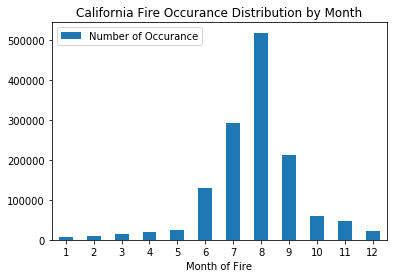

In [84]:
# Fire frequency by Month

FRPdf_West_grouped_by_month = FRPdf_West.groupby(['fire_month']).count().reset_index().rename(columns={"fire_month":"Month of Fire","frp":"Number of Occurance"})
FRPdf_West_grouped_by_month.loc[:, ['Month of Fire','Number of Occurance']].head(15)

ax = FRPdf_West_grouped_by_month.loc[:, ['Month of Fire','Number of Occurance']].plot.bar(x='Month of Fire', y='Number of Occurance', rot=0)
plt.title('California Fire Occurance Distribution by Month') 